In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

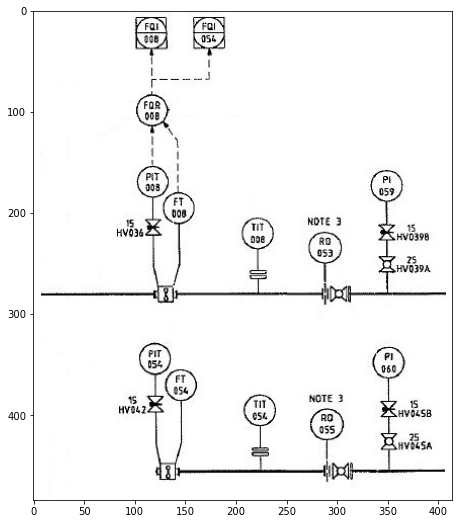

In [2]:
image = 'pid_test_circles.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img, cmap='gray')

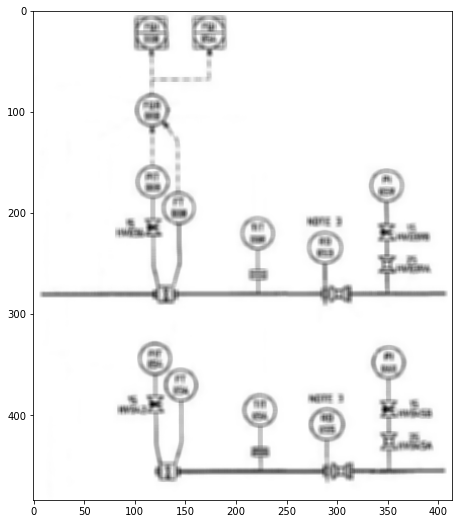

In [3]:
img = cv2.GaussianBlur(img, (5,5), 8)
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img, cmap='gray')

In [4]:
all_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.1, 35, param1 = 20, param2= 10, minRadius = 14, maxRadius = 15)
all_circles_rounded = np.uint16(np.around(all_circles))

print (all_circles_rounded)
print (all_circles_rounded.shape)
print ('It found ' + str(all_circles_rounded.shape[1]) + ' circles on the pi&d')

[[[120 168  14]
  [148 370  14]
  [118 344  14]
  [224 218  14]
  [354 348  14]
  [120  98  14]
  [220 394  14]
  [348 174  14]
  [288 412  14]
  [118  22  14]
  [146 194  14]
  [288 236  14]
  [172  22  14]]]
(1, 13, 3)
It found 13 circles on the pi&d


In [5]:
count = 1
for i in all_circles_rounded[0, :]:
    cv2.circle(img_orig, (i[0], i[1]), i[2], (50, 200, 200), 5)
    cv2.circle(img_orig, (i[0], i[1]), i[2], (255, 0, 0), 3)
    cv2.putText(img_orig, 'Circle ' + str(count), (i[0]-70, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    count += 1

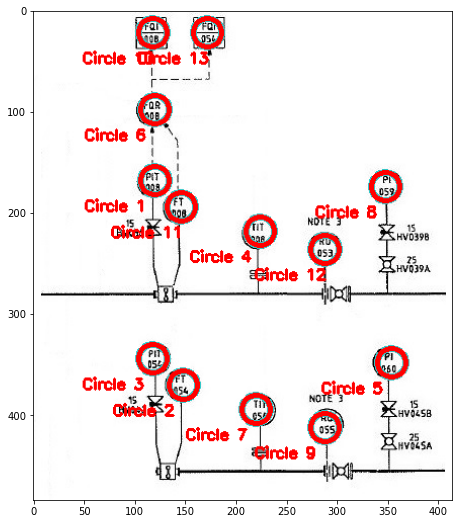

In [6]:
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_orig)